## Demo of convolution operation

Here we illustrate the convolution operation on images, using the `scipy.signal.convolve2d` function.
This will help to build some understanding of what is being done in convolutional neural networks 
for classification.



In [1]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt

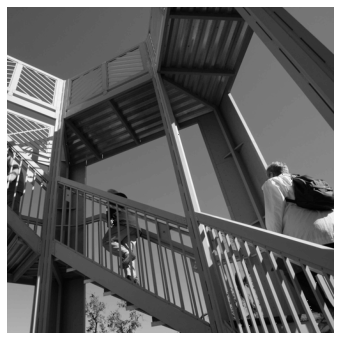

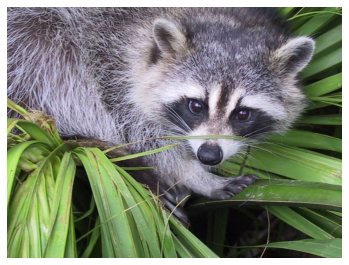

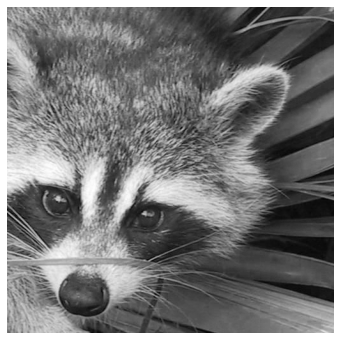

In [2]:
def show_image(img):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

ascent = misc.ascent()
show_image(ascent)

rocky = misc.face()
show_image(rocky)

rocky = rocky[0:512,500:1012:,0]
show_image(rocky)


In [3]:
def show_filter(filter):
    plt.imshow(filter, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.show()
    
def create_gaussian_filter(n, sig2):
    a = b = (n-1)/2
    filter = np.zeros(n*n).reshape(n,n)
    for i in np.arange(n):
        for j in np.arange(n):
            dist = (i-a)**2+(j-b)**2
            filter[i][j] = np.exp(-dist/(2*sig2)) * (dist < a**2)
    filter = filter/np.max(filter)
    filter = filter/np.sum(filter)
    show_filter(filter)
    return(filter)

def create_edge_filter(n, theta=0, scale=1):
    a = b = (n-1)/2
    filter = np.zeros(n*n).reshape(n,n)
    R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta), np.cos(theta)]])
    for i in np.arange(n):
        for j in np.arange(n):
            z = R @ np.array([i-a, j-b])
            filter[i][j] = np.tanh(scale*(z[1]))
    filter = filter / np.max(filter)
    filter = filter - np.sum(filter)
    show_filter(filter)
    return(filter)

def convolve_image(img, filter):
    smoothed = signal.convolve2d(img, filter, boundary='symm', mode='same')
    fig, (ax_orig, ax_smoothed) = plt.subplots(1, 2, figsize=(12, 6))
    ax_orig.imshow(img, cmap='gray')
    ax_orig.set_title('original')
    ax_orig.set_axis_off()
    ax_smoothed.imshow(smoothed, cmap='gray')
    ax_smoothed.set_title('smoothed')
    ax_smoothed.set_axis_off()
    plt.show()



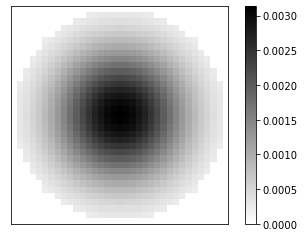

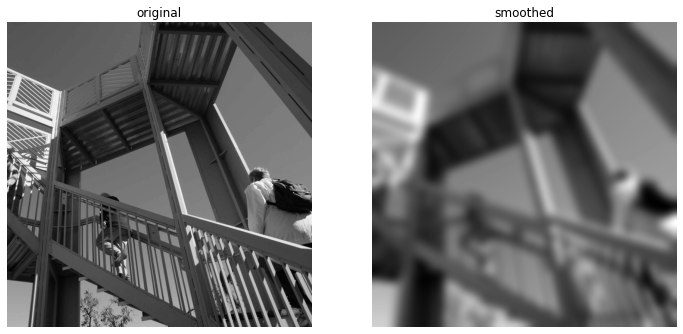

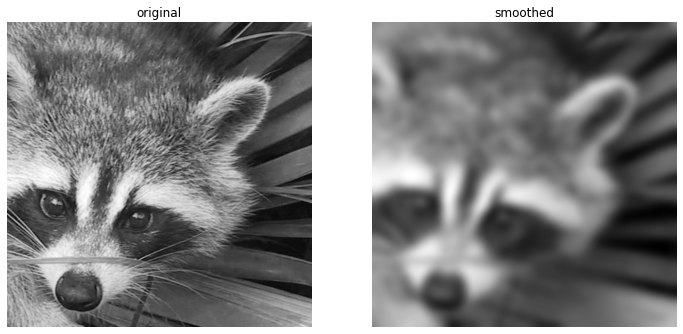

In [4]:
gaussian_filter = create_gaussian_filter(35, 55)
convolve_image(ascent, gaussian_filter)
convolve_image(rocky, gaussian_filter)

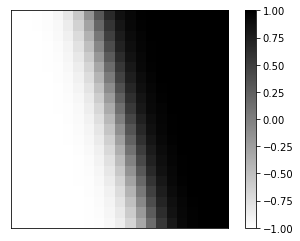

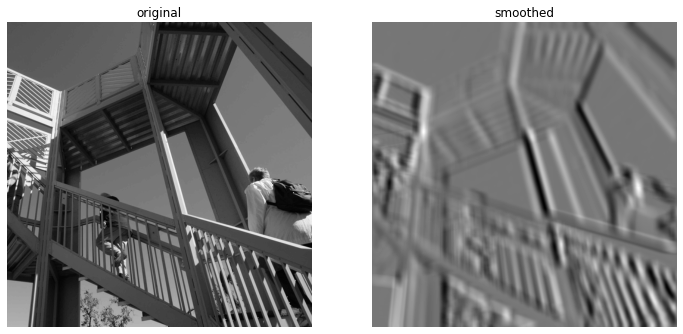

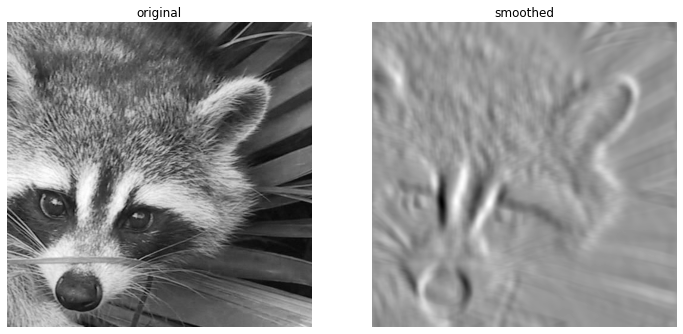

In [5]:
edge_filter = create_edge_filter(21, theta=np.pi/12, scale=.5)
convolve_image(ascent, edge_filter)
convolve_image(rocky, edge_filter)